<a href="https://colab.research.google.com/github/Malanda-juste/Tensorflow/blob/master/housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn import datasets

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## **Importation des donnees**

In [3]:
housing = datasets.fetch_california_housing()

all_x_train, x_test, all_y_train, y_test = train_test_split(
    housing.data, housing.target
)
print(all_x_train.shape, x_test.shape, "\n")
print(all_y_train.shape, y_test.shape)

(15480, 8) (5160, 8) 

(15480,) (5160,)


In [4]:
#types de donnees
all_x_train.dtype, all_y_train.dtype

(dtype('float64'), dtype('float64'))

In [5]:
#voir quelques donnees
all_x_train[:3, :]

array([[ 3.98210000e+00,  2.20000000e+01,  5.78313253e+00,
         1.07228916e+00,  7.74000000e+02,  3.10843373e+00,
         3.75700000e+01, -1.20880000e+02],
       [ 3.97370000e+00,  1.80000000e+01,  1.02002176e+01,
         1.93688792e+00,  1.67800000e+03,  1.82589771e+00,
         3.37900000e+01, -1.16540000e+02],
       [ 4.57640000e+00,  1.70000000e+01,  6.64965197e+00,
         1.02552204e+00,  1.35400000e+03,  3.14153132e+00,
         3.33400000e+01, -1.17240000e+02]])

In [6]:
all_y_train[:10]

array([2.043  , 2.356  , 2.573  , 1.569  , 2.717  , 1.841  , 5.00001,
       1.467  , 2.333  , 3.372  ])

## **Donnees de validation**

In [7]:
x_train, x_val, y_train, y_val = train_test_split(all_x_train, all_y_train)

x_train.shape, x_val.shape, y_train.shape, y_val.shape

((11610, 8), (3870, 8), (11610,), (3870,))

## **Standarisation des donnees**

In [9]:
scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_val_scaler = scaler.transform(x_val)
x_test_scaler = scaler.transform(x_test)


print(f"max_y_train - Min_y_train [{np.max(y_train)} - {np.min(y_train)}]")
print(f"Max_y_val - Min_y_val [{np.max(y_val)} - {np.min(y_val)}]")
print(f"Max_y_test - Min_y_test [{np.max(y_test)} - {np.min(y_test)}]")


max_y_train - Min_y_train [5.00001 - 0.14999]
Max_y_val - Min_y_val [5.00001 - 0.14999]
Max_y_test - Min_y_test [5.00001 - 0.14999]


In [11]:
x_train_scaler.shape[1:]

(8,)

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(30, 'relu', input_shape=x_train_scaler.shape[1:]))
model.add(keras.layers.Dense(15, 'relu'))
model.add(keras.layers.Dense(8, 'relu'))
model.add(keras.layers.Dense(1, 'relu'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 30)                  │             270 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │             465 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 872 (3.41 KB)

 Trainable params: 872 (3.41 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
results = model.fit(x_train_scaler, y_train, epochs=100 ,\
                         validation_data = (x_val_scaler, y_val))

Epoch 1/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 3.4068 - mae: 1.3864 - val_loss: 0.5123 - val_mae: 0.5328
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4677 - mae: 0.4955 - val_loss: 0.4194 - val_mae: 0.4499
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3976 - mae: 0.4489 - val_loss: 0.3886 - val_mae: 0.4370
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3828 - mae: 0.4358 - val_loss: 0.3828 - val_mae: 0.4435
Epoch 5/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3681 - mae: 0.4285 - val_loss: 0.3711 - val_mae: 0.4381
Epoch 6/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3493 - mae: 0.4202 - val_loss: 0.3609 - val_mae: 0.4203
Epoch 7/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3433 - mae: 0.4178 - val_loss: 0.3482 - val_mae: 0.4179
Epoch 8/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3304 - mae: 0.4098 - val_loss: 0.3414 - val_mae: 0.4084
Epoch 9/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/

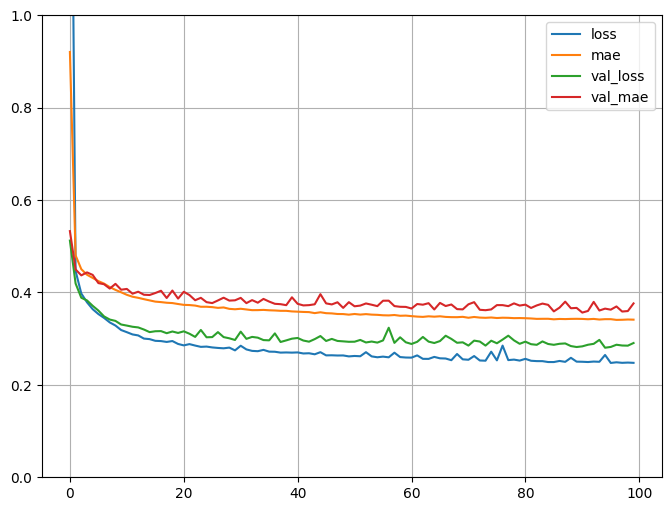

In [18]:
pd.DataFrame(results.history).plot(figsize=(8,6))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()



In [19]:
model.evaluate(x_test_scaler, y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3236 - mae: 0.3830


[0.3213338851928711, 0.3851093053817749]